# Predicting bike rentals with shallow algorithms

Columns from dataset
* instant - A unique sequential ID number for each row
* dteday - The date of the rentals
* season - The season in which the rentals occurred
* yr - The year the rentals occurred
* mnth - The month the rentals occurred
* hr - The hour the rentals occurred
* holiday - Whether or not the day was a holiday
* weekday - The day of the week (as a number, 0 to 7)
* workingday - Whether or not the day was a working day
* weathersit - The weather (as a categorical variable)
* temp - The temperature, on a 0-1 scale
* atemp - The adjusted temperature
* hum - The humidity, on a 0-1 scale
* windspeed - The wind speed, on a 0-1 scale
* casual - The number of casual riders (people who hadn't previously * * * * signed up with the bike sharing program)
* registered - The number of registered riders (people who had already signed up)
* cnt - The total number of bike rentals (casual + registered)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv')
print(bike_rentals.shape)
bike_rentals.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


189.46308763450142


(array([4821., 2151., 1917., 1788., 1493., 1166.,  931.,  729.,  542.,
         445.,  371.,  292.,  203.,  166.,  119.,   69.,   80.,   59.,
          25.,   12.]),
 array([  1. ,  49.8,  98.6, 147.4, 196.2, 245. , 293.8, 342.6, 391.4,
        440.2, 489. , 537.8, 586.6, 635.4, 684.2, 733. , 781.8, 830.6,
        879.4, 928.2, 977. ]),
 <a list of 20 Patch objects>)

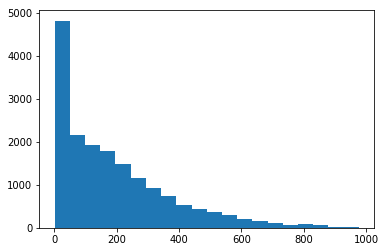

In [2]:
print(bike_rentals['cnt'].mean())
plt.hist(bike_rentals['cnt'], bins = 20)


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


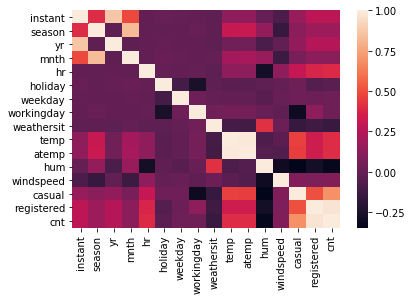

In [3]:
corr = bike_rentals.corr()['cnt'].sort_values(ascending=False)
print(corr)
sns.heatmap(bike_rentals.corr())

On initial review, appears that the temperature and hour of the day are fairly well correlated with number of bike rentals.   Registered and casual riders are highly correlated with number of bikes rented because the total number is simply a sum of these two.  We will of course omit these columns as features

In [4]:
def assign_label(row):
    hr = row['hr']
    label = 0
    if hr > 6 and hr <= 12:
        label = 1
    elif hr > 12 and hr <= 18:
        label = 2
    elif hr > 18 and hr <= 24:
        label = 3
    elif hr > 0 and hr <= 5:
        label = 4
    row['time_label'] = label
    return row
bike_rentals = bike_rentals.apply(assign_label, axis=1)
bike_rentals.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


This is a regression problem, so I will use one of MAE, MSE, and RMSE.  I want to be understandable in terms of bikes (not bikes^2) therefore I will not use MSE.  I will experiment with both MAE and RMSE

In [5]:
shuffled_df = bike_rentals.sample(frac=1)
train_test_split = int(0.8*shuffled_df.shape[0])
train = shuffled_df.iloc[:train_test_split]
test = shuffled_df.iloc[train_test_split:]
assert train.shape[0] > test.shape[0]

In [6]:
def model(model, train, test, features):
    '''
    Convenience method for doing quick modeling
    '''
    model = model.fit(train[features],train['cnt'])
    train_pred = model.predict(train[features])
    test_pred = model.predict(test[features])
    print(
"""Training set:
    MAE: {}
    RMSE: {}
            
Test set:
    MAE: {}
    RMSE: {}""".format(
        mean_absolute_error(train['cnt'],train_pred),
        mean_squared_error(train['cnt'],train_pred)**0.5,
        mean_absolute_error(test['cnt'],test_pred),
        mean_squared_error(test['cnt'],test_pred)**0.5,
        ))
    return model

### Linear regression

In [7]:
features = bike_rentals.columns[2:14]

lr = LinearRegression()
lr = model(lr, train, test, features)

Training set:
    MAE: 105.1689568290051
    RMSE: 141.07215958893943
            
Test set:
    MAE: 107.85123754520203
    RMSE: 144.7405266772826


MAE and RMSE of linear regression is in low 100s.  Not very good as average bike rental per hour is 189

### Decision Tree

In [8]:
tree = DecisionTreeRegressor(criterion='mse')
tree = model(tree, train, test, features)

Training set:
    MAE: 0.008847011436380637
    RMSE: 0.46129795086011466
            
Test set:
    MAE: 35.28322784810127
    RMSE: 61.65158036831044


Wow, plain decision tree is much better than linear regression.  However, there is lots of evidence of overfitting.  Let's try some regularizing techniques

In [9]:
tree = DecisionTreeRegressor(max_depth=11)
tree = model(tree, train, test, features)

Training set:
    MAE: 24.87630010333801
    RMSE: 42.16337707412209
            
Test set:
    MAE: 33.62759001852997
    RMSE: 56.72481495740885


Overfitting less, and accuracy slightly improved

In [10]:
tree = DecisionTreeRegressor(min_samples_split=11)
tree = model(tree, train, test, features)

Training set:
    MAE: 16.519703352822106
    RMSE: 28.567868541473363
            
Test set:
    MAE: 31.9387795221656
    RMSE: 54.70426761102442


Accuracy even better

### Random Forest regressor

In [14]:
forest = RandomForestRegressor(n_estimators=10)
forest = model(forest, train, test, features)

Training set:
    MAE: 10.926344194298592
    RMSE: 19.37330006188485
            
Test set:
    MAE: 27.779195435366322
    RMSE: 47.238538459681436


Without any special techniques, random forest has achieved much better accuracy than decision tree

In [15]:
forest = RandomForestRegressor(n_estimators=100)
forest = model(forest, train, test, features)

Training set:
    MAE: 9.548277816024633
    RMSE: 16.05238278733241
            
Test set:
    MAE: 26.12150700038358
    RMSE: 44.33714820526961


Adding additional estimators boosts performance further

In [16]:
forest = RandomForestRegressor(n_estimators=200)
forest = model(forest, train, test, features)

Training set:
    MAE: 9.436064364890985
    RMSE: 15.781227310272747
            
Test set:
    MAE: 25.953629945476465
    RMSE: 44.11923605667265


Negligible boost from adding estimators beyond 100